# Коллекция львят

<img src="http://victoria.tc.ca/~quantum/leo.jpg"/>


У каждого они были, но я не видел человека, который собрал бы их всех. А ведь интересно, сколько усилий для этого нужно? И реально ли это вообще?

### Модель

Пусть у нас уже есть часть коллекции и я покупаю очередное яйцо. С вероятностью $p$ там окажется один из львят. Но с вероятностью $q = 1 - p$ там оказывается левая сборная игрушка типа такой:

<img src="http://nerdywithchildren.com/wp-content/uploads/2013/08/5875976204_8e2f27a421_z.jpg" width="200px" align="left" margin="50px"/>

К победе это нас нисколько не приблизит. Если же нам попался львенок, то каждую игрушку коллекции я считаю равновероятной. Понятно как обобщить модель на разные вероятности, но таких данных у меня нет, а параметров будет слишком много, чтобы можно было как-то прицениться. В общем, такой подставы, как разные вероятности элементов коллекции ,я сейчас не ожидаю.

Тогда:
<div border="2px solid black" outline="black solid 5px">
$\mathbb{P}(i, n) = \mathbb{P}(i, n - 1) [q + p \frac{i}{k}] +$
$\mathbb{P}(i - 1, n - 1) [p \frac{k - i + 1}{k}]$, 
$\mathbb{P}(0, 1) = 0$, 
$\mathbb{P}(0, 0) = 1$
</div>

Где $\mathbb{P}(i, n)$ - вероятность получить ровно $0 < i \leq k$ львят за ровно $n > 0$ покупок. А $k$ - общее количество элементов коллекции.

### Сколько же нужно купить

На данный вопрос нам ответит expected value. Но свернуть сумму с рекуретным выражением, чтобы явно его посчитать проблематично. Поэтому, пойдем другим путем: определим сколько яиц нужно купить, чтобы получить очередной элемент коллекции. Когда $i$ фиксировано - это простой эксперимент Бернулли: либо получилось, либо нет. С константой вероятностью (она поменяется только на следующем шаге). Мат ожидание такой величины известно: $1/\mathbb{P}$ [если $\mathbb{P} = 1/n$, то в среднем нужно купить $n$ яиц]. А так как шаги независимы - просуммируем их.

Если уже есть $i$ львят, то следующий достанется с вероятностью $\mathbb{P} = p \frac{k - i}{k}$

In [43]:
def expect_value(k, p):
    steps = [k / p / (k - i)  for i in range(k)]
    return sum(steps)

array([  29.28968254,   58.57936508,   88.75661376,  117.15873016,
        146.4484127 ,  292.8968254 ])

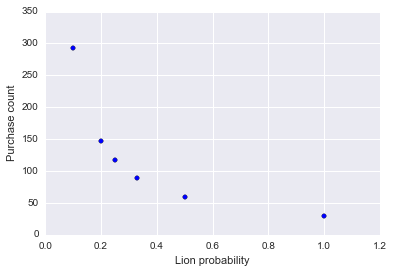

In [66]:
k = 10
ps = [1., .5, .33, .25, .2, .1]
count = np.vectorize(lambda p: expect_value(k, p), otypes=[np.float])(ps)
plt.scatter(ps, count)
plt.xlabel('Lion probability')
plt.ylabel('Purchase count')
count

Если бы в каждом яйце был львенок, нужно было бы в среднем купить 29.29 яиц, чтобы собрать коллекцию. Но когда львенок в каждом третьем - это уже 88.76 яиц.

### Каковы же мои шансы?

Expectation хороший ориентир, но он недостаточно хорошо отвечает на вопрос. Ведь человек, купивший 100 яиц может и не собрать коллецию, тогда он навсегда может разочароваться в математике. Обычно в таких случаях используют интервальные оценки. Но ответ, что с 95% вероятностью нужно купить от X до Y яиц озадачит еще больше. Так сколько же нужно брать?

Понятно, что можно быть очень удачливым и уложиться в 10 покупок. А можно не собрать коллекцию и за 10000 попыток - вероятность такого события не нулевая. Поэтому нарисуем график количество попыток - вероятность собрать коллекцию. Таким образом, можно будет определить для себя вероятность: хочу собрать коллецию с 80% вероятностью и понять сколько нужно брать? Или определить бюджет: есть $100, какова вероятность собрать коллекцию? То есть, нарисуем CDF.

In [64]:
def prob(N, k, p):
    q = 1. - p
    dynamic_table = np.zeros((N + 1) * (k + 1)).reshape(k + 1, N + 1)
    for n in range(N + 1):
        dynamic_table[0][n] = q ** n
    for n in xrange(1, N + 1):
        for i in range(1, k + 1):
            dynamic_table[i][n] = \
                dynamic_table[i][n - 1] * (p * float(i) / k + q) + \
                dynamic_table[i - 1][n - 1] * p * float(k - i + 1) / k
    return dynamic_table[k]

Я видел, что задача о коллекционере для $p = 1$ разобрана на хабре, но там все магическим образом сведено с ряду Стирлинга 2ого рода с поправочным коэффициентом. Считать заведомо большее число не хочется, чтобы не словить сложностей с большими float'ами. А на асимптотике вроде выигрыша вроде нет, так как здесь нужно точное значение факториала, а не его приближение. Раз есть красивая формула выше, можно сделать простой динамикой.

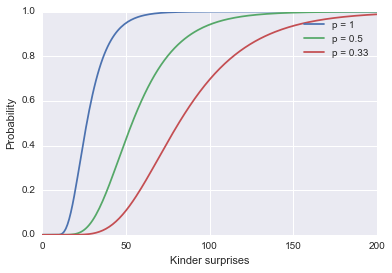

In [65]:
N = 200
k = 10
plt.plot(prob(N, k, 1.), label='p = 1')
plt.plot(prob(N, k, 0.5), label='p = 0.5')
plt.plot(prob(N, k, 0.33), label='p = 0.33')
plt.ylabel('Probability')
plt.xlabel('Kinder surprises')
plt.legend()

Чтобы при $p = 0.33$ собрать коллецию с вероятностью ~80% нужно купить 115 яиц.

In [75]:
purchase_prob = prob(150, 10, 0.33)
count = np.argwhere(purchase_prob >= 0.8).min()
count, purchase_prob[count]

(115, 0.80589016974706185)

### Численный эксперимент

Хорошо, график CDF есть. Но распределение понятнее, когда есть график плотности. Проведем численный эксперимет, чтобы проверить результаты и заодно нарисуем PDF.

Отчаяно покупаем пока не соберется вся коллекция.

In [107]:
def simulation(k, p):
    lion_collection = set()
    toy_type_dist = stats.bernoulli(p)
    lion_dist = stats.randint(0, k)
    purchaes_counter = 0
    while len(lion_collection) < k:
        purchaes_counter += 1
        if toy_type_dist.rvs() == 1:
            lion_collection.add(lion_dist.rvs())
    return purchaes_counter

In [114]:
purchases = np.vectorize(lambda iteration: simulation(10, .33))(np.arange(10000))

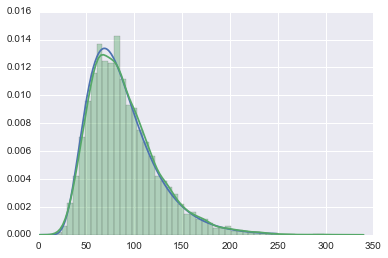

In [115]:
plt.plot(sp.diff(prob(250, 10, 0.33)))
sns.distplot(purchases)

### Важные выводы

Кого сильно пробило на ностальгию, могут за 500 руб купить коллецию на ebay, например [здесь]( http://www.ebay.com/itm/KINDER-SURPRISE-SET-LEO-VENTURAS-LIONS-ADVENTURE-1993-FIGURES-COLLECTIBLES-/251510901727?hash=item3a8f37cbdf:g:2YoAAOxyF19SEC9K).

При цене одного яйца в [утконосе](http://www.utkonos.ru/item/3217164) в 259 руб очевидно, что антиквариат из них так себе, и денег на продаже собранных коллекций не поднять.

### Imports

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.stats as stats
%matplotlib inline